In [18]:
from PIL import Image
from IPython.display import display
import numpy as np
import glob, os
import shutil
import csv

In [19]:
def make_square(im, min_size=512, fill_color=(0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

In [20]:
def resize_square_image(im, resize=500):
    """
    將傳入的 im (PIL.Image) 並縮放成 resize by resize 大小。
    """
    x, y  = im.size
    if x != y:
        raise Exception("Non square image {}x{}.".format(x,y))
    
    return im.resize((resize, resize),Image.ANTIALIAS)

In [21]:
"""
將任何一張圖片 讀入 指定大小的"子圖"(ndarray)。
"""
def img_segment(image, size, stride, limit=5000):
    """
    image: 欲切割原圖。
    size: 子圖大小，一律正方型。
    stride: 每個子圖所間隔的距離,一般來說會跟size相同。
    limit : 子圖極限。# 防止記憶體爆炸，子圖不產生超過限制。
    """
    
    im = np.asarray(image)
    w, h  = im.shape[1::-1]
    ret = [] # 回傳的子圖 (list).
    
    # non-overlapping 走訪
    w_interval = []
    sign = 0 # 切割點
    while ( w > sign):
        if ((sign+size) > w ):
            break
        w_interval.append(sign)
        sign += stride
    # =========================    
    h_interval = []
    sign = 0 # 切割點
    while ( h > sign):
        if ((sign+size) > h ):
            break
        h_interval.append(sign)
        sign += stride
    
    # 防止記憶體爆炸
    if (len(h_interval)*len(w_interval) > limit):
        print("Oops 切出太多子圖了，切出了 {} 張，少一點~,限制={}張".format(len(h_interval)*len(w_interval),limit))
        raise Exception("Too much subimage~ Please 調整 \"size\" or \"stride\".")
    
    for h_sign in h_interval:
        for w_sign in w_interval:
            ret.append(im[h_sign:h_sign+size,w_sign:w_sign+size])
                
    return ret

In [23]:
# 輸出 資料夾
SAVE_SEGMENT_IMAGES_PATH = os.getcwd()+"/data/segmented"
# 來源 資料夾
SOURCE_IMAGES_PATH = os.getcwd()+"/data/qr-code"

if os.path.exists(SAVE_SEGMENT_IMAGES_PATH):
    print("\"{}\" have exists, delete this path...".format(SAVE_SEGMENT_IMAGES_PATH))
    shutil.rmtree(SAVE_SEGMENT_IMAGES_PATH)
else:
    print("Create", SAVE_SEGMENT_IMAGES_PATH,"...")
    
os.makedirs(SAVE_SEGMENT_IMAGES_PATH)  
print("Create \"{}\" successfully.".format(SAVE_SEGMENT_IMAGES_PATH))


"D:\lab/data/segmented" have exists, delete this path...
Create "D:\lab/data/segmented" successfully.


In [24]:
images_pth_list = glob.glob(SOURCE_IMAGES_PATH+"/*")

# 等等要創的資料夾名稱
folder_name = []

for pth in images_pth_list:
    folder_name.append(pth[pth.rfind("\\")+1:].replace('.','_'))

folder_imgPth_zip = zip(folder_name,images_pth_list)

In [25]:
# 邊切圖片 邊創資料夾
for folder,img_pth in folder_imgPth_zip:
    tar_pth = SAVE_SEGMENT_IMAGES_PATH+"/"+folder
    if os.path.isdir(tar_pth):
        shutil.rmtree(tar_pth)
    os.makedirs(tar_pth)
    print("Folder: \"{}\" created.".format(folder))
    # 切換至已創建目錄
    oldwd = os.getcwd()
    os.chdir(tar_pth)
    print("current: \"{}\"".format(os.getcwd()))
    
    # =================================================== < 子圖生成區塊>
    # 可以直接丟 segmented 的 圖 跟 {圖片名}.csv 檔案了
    im = Image.open(img_pth) 
    im = make_square(im) # 轉正方形
    im = resize_square_image(im) # 將大小調至 500
    
    weget = img_segment(im,size=32,stride=32) # 取子圖
    weget = [Image.fromarray(a) for a in weget] # ndarray -> PIL.Image
    
    # =================================================== </子圖生成區塊>
    
    sub_image_name = [] # csv 紀錄 label 用
    for idx,image in enumerate(weget):
        fname = "qq_"+str(idx)+".jpg" # 這個 "qq_" prefix 別再做修改了，後面的程式是寫死 "qq_" 的
        image.save(fname)
        sub_image_name.append(fname)
    
    # 創造 csv檔案，預先放入 ALL "Zero" = background
    with open("uncheck-"+folder+".csv", 'w', newline='') as file:
        writer = csv.writer(file)
        for im_name in sub_image_name:
            writer.writerow([im_name, "0"])

    # 回至原來/目錄
    os.chdir(oldwd)

Folder: "qr_0001_jpg" created.
current: "D:\lab\data\segmented\qr_0001_jpg"
Folder: "qr_0002_jpg" created.
current: "D:\lab\data\segmented\qr_0002_jpg"
Folder: "qr_0003_jpg" created.
current: "D:\lab\data\segmented\qr_0003_jpg"
Folder: "qr_0004_jpg" created.
current: "D:\lab\data\segmented\qr_0004_jpg"
Folder: "qr_0005_jpg" created.
current: "D:\lab\data\segmented\qr_0005_jpg"
Folder: "qr_0006_jpg" created.
current: "D:\lab\data\segmented\qr_0006_jpg"
Folder: "qr_0007_jpg" created.
current: "D:\lab\data\segmented\qr_0007_jpg"
Folder: "qr_0008_jpg" created.
current: "D:\lab\data\segmented\qr_0008_jpg"
Folder: "qr_0009_jpg" created.
current: "D:\lab\data\segmented\qr_0009_jpg"
Folder: "qr_0010_jpg" created.
current: "D:\lab\data\segmented\qr_0010_jpg"
Folder: "qr_0011_jpg" created.
current: "D:\lab\data\segmented\qr_0011_jpg"
Folder: "qr_0012_jpg" created.
current: "D:\lab\data\segmented\qr_0012_jpg"
Folder: "qr_0013_jpg" created.
current: "D:\lab\data\segmented\qr_0013_jpg"
Folder: "qr_

In [6]:
im = Image.open("./data/qr-code/7.jpg") 
im = make_square(im) # 轉正方形
im = resize_square_image(im) # 將大小調至 500

weget = img_segment(im,size=32,stride=32) # 取子圖
weget = [Image.fromarray(a) for a in weget] # ndarray -> PIL.Image

In [7]:
for idx,image in enumerate(weget):
    image.save("./data/222/qq_"+str(idx)+".jpg") 

In [88]:
 os.getcwd()

'D:\\lab'

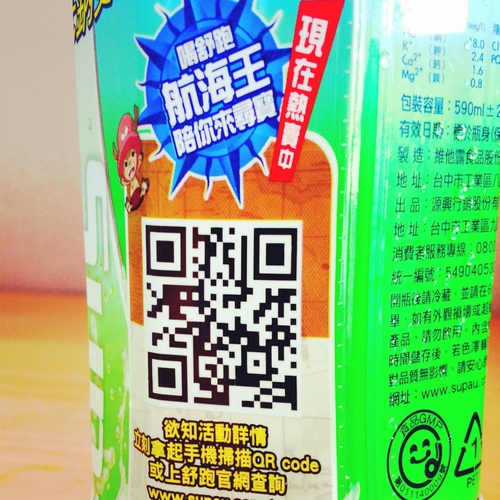

In [8]:
im = Image.open("./data/qr-code/7.jpg")
im = make_square(im)

im = resize_square_image(im)
display(im)

In [25]:
cc = r'D:\lab\data\segmented\qr_0001_jpg'
glob.glob(cc+"\\*.*")[0]

'D:\\lab\\data\\segmented\\qr_0001_jpg\\qq_0.jpg'

In [13]:
import math

# 用爆力法檢定 是否為平方數
def isqrt(n):
    MAX_ = 1000**2
    if n >= MAX_:
        raise Exception("Too big n={}, but limit is MAX={}".format(n,MAX_))

    for i in range(math.ceil(math.sqrt(MAX_)+1)):
        if i**2 == n:
            return True
    return False

In [17]:
math.floor(math.sqrt(100))

10